In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score

In [3]:
# DATASET_PATH = f'/tf/KAIER_2022/Battery_data/{dataset_type}_class'
DATASET_PATH = f'/tf/KAIER_2022/Battery_data/eight ensemble model'

from glob import glob
import os
def get_label(mode = 'test'):
    
#     if dataset_type == 'multi':
#         normal_names = ['코팅부 경계부 불량', '무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
#                      '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량']
#         abnormal_names = ['코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
#     elif dataset_type == 'one':
#         normal_names = ['코팅부 경계부 불량']
#         abnormal_names = ['무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
#                      '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량', '코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
        
    # ensemble model 
    normal_names = ['코팅부 경계부 불량','무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', '코팅부 기재연결부', '무지부 기재연결부']
    abnormal_names = ['코팅부 줄무늬', '코팅부 테이프',  '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량',\
                      '코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
    
    # one class model 
#     class_list = ['코팅부 경계부 불량','무지부 줄무늬', '코팅부 접힘', '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', \
#                      '코팅부 기재연결부', '무지부 기재연결부', '코팅부 코팅불량', '코팅부 버블', '코팅부 흑점', '무지부 주름', '코팅부 찍힘', '코팅부 백점', '코팅부 라벨지']
#     normal_names = '코팅부 미코팅'
#     abnormal_names = class_list.copy()
#     abnormal_names.remove(normal_names)

    fpattern = os.path.join(DATASET_PATH, f'{mode}/*/*.bmp')
    fpaths = sorted(glob(fpattern))
    
    # get only label name in data path 
    def split(x):
        return x.split('/')[-2]    

    test_class_list = list(map(split, fpaths))
    
    def change_name_to_label(x):
        if x in normal_names:
            return 0
        else:
            return 1

    test_label_list = list(map(change_name_to_label, test_class_list))

    return test_label_list, test_class_list

In [4]:
label, classes = get_label(mode='test')
print(len(label))

2259


In [6]:
np.unique(classes, return_counts=True)

(array(['무지부 기재연결부', '무지부 주름', '무지부 줄무늬', '코팅부 경계부 불량', '코팅부 기재연결부',
        '코팅부 라벨지', '코팅부 미코팅', '코팅부 백점', '코팅부 버블', '코팅부 접힘', '코팅부 줄무늬',
        '코팅부 찍힘', '코팅부 코팅불량', '코팅부 테이프', '코팅부 흑점'], dtype='<U10'),
 array([  15,   12,  349, 1359,   21,    4,  114,    5,   28,  170,   62,
           6,   42,   59,   13]))

In [10]:
score_dict = {}
for i in range(1,9):
#     globals()['score_{}'.format(i)] = np.load(f"save/ensemble model/2_15_efficientnet_b6/model_{i}_anomaly_scores.npy")
    score_dict[f'{i}'] = np.load(f"save/ensemble model/2_15_efficientnet_b6/model_{i}_anomaly_scores.npy")

In [20]:
np.where(np.array(classes) == '코팅부 경계부 불량')[0]

array([ 376,  377,  378, ..., 1732, 1733, 1734])

test 데이터에서 각 클래스별 정상 분포 확인하기 

In [21]:
normal_names = ['코팅부 경계부 불량','무지부 줄무늬', '코팅부 접힘',\
                '코팅부 미코팅', '코팅부 줄무늬', '코팅부 테이프', '코팅부 기재연결부', '무지부 기재연결부']

In [31]:
describe_df = pd.DataFrame()
for i, norm in enumerate(normal_names):
    index = np.where(np.array(classes) == norm)[0]
    test_norm_score = score_dict[f'{i+1}'][index]
    tmp_df = pd.DataFrame({'tmp':test_norm_score})
    describe_df[f'{i}'] = tmp_df.describe()['tmp'].values

In [33]:
describe_df.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [35]:
describe_df

,0,1,2,3,4,5,6,7
count,1359.000000,349.000000,170.000000,114.000000,62.000000,59.000000,21.000000,15.000000
mean,799.284440,5638.581388,3056.596972,4299.497211,6043.618677,4841.709557,66496.633512,84746.250277
std,268.960537,697.595159,707.699379,1154.470776,2215.595287,1367.388002,12301.595960,11000.456284
min,552.960515,4128.068030,2398.416597,2062.465543,3894.512352,3151.527662,55414.273469,70143.556830
25%,669.835860,5140.115954,2668.342414,3609.798464,4759.217516,3912.182878,59131.927898,77567.615248
50%,731.547647,5555.965482,2814.051676,3981.832279,5147.228809,4629.193003,62171.766899,85647.753310
75%,827.763602,5995.957070,3088.623136,4778.690317,6380.928054,5175.413076,69417.234712,89105.998264
max,4121.934042,9427.239145,5733.529939,9297.127761,15839.773632,9754.836602,106623.055972,115376.135700


In [36]:
describe_df.to_csv("tmp.csv")

In [53]:
score_list = []
label_list = []
for i in range(1,9):
    score = np.load(f"save/ensemble model/2_15_efficientnet_b6/model_{i}_anomaly_scores.npy")
    label = [i]*len(score)
    
    score_list += list(score)
    label_list += label
#     break

In [5]:
print(len(score_2))

2259


score별 scale 비교하기

In [25]:
bins = np.linspace(0, 200000, 10)

In [23]:
bins

array([     0.,  50000., 100000., 150000., 200000.])

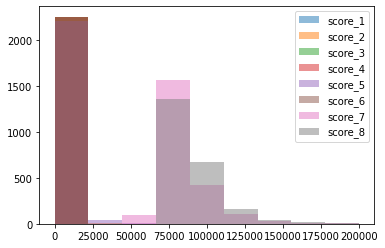

In [26]:
plt.hist(score_1, bins, alpha = 0.5, label='score_1')
plt.hist(score_2, bins, alpha = 0.5, label='score_2')
plt.hist(score_3, bins, alpha = 0.5, label='score_3')
plt.hist(score_4, bins, alpha = 0.5, label='score_4')
plt.hist(score_5, bins, alpha = 0.5, label='score_5')
plt.hist(score_6, bins, alpha = 0.5, label='score_6')
plt.hist(score_7, bins, alpha = 0.5, label='score_7')
plt.hist(score_8, bins, alpha = 0.5, label='score_8')

plt.legend(loc='upper right')

In [59]:
score_df = pd.DataFrame()

In [60]:
score_df['score'] = score_list
score_df['label'] = label_list

In [93]:
score_df

,score,label
0,2165.220199,1
1,1814.833857,1
2,1453.096906,1
3,1679.012313,1
4,1823.845920,1
...,...,...
18067,90523.539890,8
18068,100137.063618,8
18069,96760.502626,8
18070,136056.954858,8


In [99]:
score_df['normal/abnormal'] = label*8

In [72]:
score_describe = score_df[score_df.label==1].describe()['score']
score_describe

count    2259.000000
mean     1185.668350
std       754.477658
min       552.960515
25%       708.372461
50%       877.079778
75%      1447.857965
max      8809.303986
Name: score, dtype: float64

In [76]:
score_describe.values

array([2259.        , 1185.66834991,  754.47765776,  552.96051508,
        708.37246118,  877.079778  , 1447.85796483, 8809.30398553])

In [110]:
new_score_df = score_df[score_df['normal/abnormal']==1]

In [111]:
new_score_df.shape

(880, 3)

In [112]:
describe_df = pd.DataFrame()
for i in range(1,9):
    describe_df[f'{i}'] = new_score_df[new_score_df.label==i].describe()['score'].values
describe_df.index = list(score_describe.index)

In [113]:
describe_df

,1,2,3,4,5,6,7,8
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1849.200823,5342.377075,3946.017528,4780.298709,7518.083194,5617.492118,92473.023604,102167.929199
std,921.517731,2528.322745,2588.706938,2187.742417,7885.080039,1347.986741,29750.686680,21312.754810
min,1048.473602,3770.325766,2394.804833,2781.191304,3335.839738,4054.702676,64354.879016,71634.740066
25%,1428.079262,4391.468772,2833.360207,3470.937569,4640.266587,4913.638778,78360.536022,90180.301160
50%,1589.720622,4866.793362,3200.334381,4069.952751,5425.459002,5300.317289,86511.458941,97290.349272
75%,1905.495031,5463.137652,4044.065869,5093.054904,7207.713965,5861.471857,95582.638340,108054.185857
max,7695.721992,28609.787709,22906.512064,14211.041921,70068.589378,11796.060197,303661.399739,209362.967949


In [82]:
describe_df.to_csv("describe_df.csv")

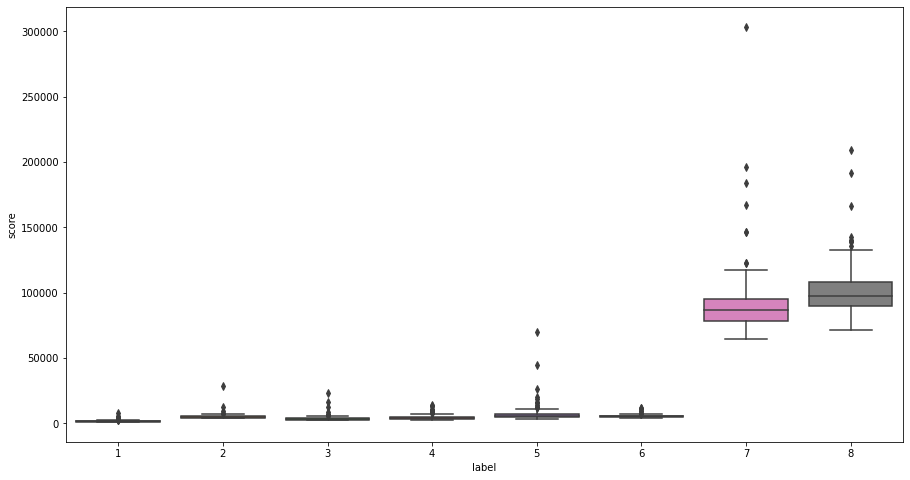

In [114]:
plt.figure(figsize=(15,8))

sns.boxplot(x="label", 
            y="score", 
            data=new_score_df)
plt.show()

In [83]:
valid_1_score = np.load("save/ensemble model/2_22_efficientnet_b6/valid_model_1_anomaly_scores.npy")

In [86]:
data_mean, data_std = np.mean(valid_1_score), np.std(valid_1_score)

In [87]:
print(data_mean, data_std)

533.946081558301 215.2617800268823


In [88]:
threshold = data_mean + data_std * 3

In [89]:
print(threshold)

1179.7314216389477


# threshold 사용하여 개별 모델 정상/비정상 판단 
threshold = mean + std*3 


In [37]:
def set_model_threshold_from_validation(idx_, describe_df):
    valid_score = np.load(f"save/ensemble model/2_22_efficientnet_b6/valid_model_{idx_}_anomaly_scores.npy")
    data_mean, data_std = np.mean(valid_score), np.std(valid_score)
    df = pd.DataFrame()
    df['tmp'] = valid_score
#     import pdb;pdb.set_trace()
    describe_df[f'{i}'] = df.describe()['tmp'].values
    threshold = data_mean + data_std * 3
    return threshold, describe_df

In [38]:
valid_threshold_list = []
describe_df = pd.DataFrame()
for i in range(1,9):
    ths, result_df = set_model_threshold_from_validation(i, describe_df)
    valid_threshold_list.append(ths)

In [39]:
valid_threshold_list

[1179.7314216389477,
 1406.7721632723114,
 1295.994050424099,
 4055.9382533217017,
 4597.822626970714,
 6252.74657852473,
 54229.47207197828,
 98838.91183752168]

In [40]:
describe_df.head()

,1,2,3,4,5,6,7,8
0,2717.000000,696.000000,339.000000,227.000000,123.000000,118.000000,41.000000,29.000000
1,533.946082,691.862358,706.679760,1025.982333,1825.724469,3038.875711,36923.929793,58768.444363
2,215.301405,238.474648,196.728471,1012.217321,927.812010,1075.858712,5840.175401,13593.244784
3,325.585190,405.435983,455.088365,580.876747,1224.204041,1608.459341,29147.037296,45313.674951
4,434.637973,536.083598,574.446728,727.176116,1409.459255,2250.095480,33337.711760,48678.665671


In [198]:
result_df.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']

In [199]:
result_df

,1,2,3,4,5,6,7,8
count,2717.000000,696.000000,339.000000,227.000000,123.000000,118.000000,41.000000,29.000000
mean,533.946082,691.862358,706.679760,1025.982333,1825.724469,3038.875711,36923.929793,58768.444363
std,215.301405,238.474648,196.728471,1012.217321,927.812010,1075.858712,5840.175401,13593.244784
min,325.585190,405.435983,455.088365,580.876747,1224.204041,1608.459341,29147.037296,45313.674951
25%,434.637973,536.083598,574.446728,727.176116,1409.459255,2250.095480,33337.711760,48678.665671
50%,480.533693,625.543918,654.109881,809.753522,1677.114344,2706.576498,34455.239652,55908.662598
75%,562.621108,779.683941,776.411167,998.876383,1890.033215,3655.824147,39633.665291,64260.185743
max,5625.309465,2219.691361,1909.947405,13563.745169,9934.738661,6384.145713,60970.110537,102327.382669


test 단계에서의 개별 모델 score 불러오고 해당하는 threshold로 정상/비정상 판단하기 

In [125]:
def detect_anomaly(idx_, threshold_list):
    ano_score = np.load(f"save/ensemble model/2_15_efficientnet_b6/model_{idx_}_anomaly_scores.npy")
    threshold = threshold_list[idx_-1]
    detection_list = [1 if sc > threshold else 0 for sc in ano_score]
    return detection_list 

In [129]:
detection_df = pd.DataFrame()

In [130]:
for i in range(1,9):
    det_result = detect_anomaly(i, valid_threshold_list)
    detection_df[f'{i}'] = det_result

In [131]:
detection_df

,1,2,3,4,5,6,7,8
0,1,1,1,1,1,0,1,0
1,1,1,1,1,1,0,1,0
2,1,1,1,1,1,0,1,0
3,1,1,1,0,1,0,1,0
4,1,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...
2254,1,1,1,0,1,0,1,0
2255,1,1,1,0,0,0,1,1
2256,1,1,1,0,0,0,1,0
2257,1,1,1,1,1,1,1,1


In [204]:
final_det = detection_df.sum(axis=1).apply(lambda x: 1 if x > 5 else 0).values

In [157]:
np.unique(final_det, return_counts=True)

(array([0, 1]), array([2128,  131]))

In [205]:
print("accuracy score: {}" .format(accuracy_score(label, final_det)))
print("recall: {}" .format(recall_score (label, final_det)))
print("preicision: {}" .format(precision_score(label, final_det)))

accuracy score: 0.6786188579017264
recall: 0.6272727272727273
preicision: 0.09151193633952255


In [168]:
np.unique(label, return_counts=True)

(array([0, 1]), array([2149,  110]))

# z score로 변환 후 minium 채택 
z = (x-mean) / std

In [41]:
def set_model_threshold_from_validation(idx_, describe_df):
    valid_score = np.load(f"save/ensemble model/2_22_efficientnet_b6/valid_model_{idx_}_anomaly_scores.npy")
    data_mean, data_std = np.mean(valid_score), np.std(valid_score)
    df = pd.DataFrame()
    df['tmp'] = valid_score
#     import pdb;pdb.set_trace()
    describe_df[f'{i}'] = df.describe()['tmp'].values
    
    return data_mean, data_std, describe_df

In [42]:
mean_list = []
std_list = []
describe_df = pd.DataFrame()
for i in range(1,9):
    mean, std, result_df = set_model_threshold_from_validation(i, describe_df)
    mean_list.append(mean)
    std_list.append(std)

In [43]:
mean_list

[533.946081558301,
 691.86235790172,
 706.6797604207337,
 1025.9823334545117,
 1825.7244688972144,
 3038.8757111187692,
 36923.92979251926,
 58768.44436266149]

In [44]:
std_list

[215.2617800268823,
 238.3032684568638,
 196.43809666778847,
 1009.9853066223967,
 924.0327193578332,
 1071.2902891353199,
 5768.514093153006,
 13356.822491620062]

In [47]:
z_score_dict = {}
for i in range(1,9):
    z_score = (score_dict[f'{i}'] - mean_list[i-1]) / std_list[i-1]
    z_score_dict[f'{i}'] = z_score

In [48]:
z_score_dict['1']

array([7.57809453, 5.9503725 , 4.26992114, ..., 3.99423119, 3.90202856,
       2.83331506])

In [49]:
z_score_dict['2']

array([17.14596203, 20.98781496, 17.766829  , ..., 14.19920821,
       24.5735742 , 15.15707872])

In [50]:
score_dict['1']

array([2165.22019884, 1814.83385735, 1453.09690566, ..., 1393.75139743,
       1373.90369554, 1143.85052485])

In [53]:
z_df = pd.DataFrame()
for i in range(1,9):
    z_df[f'{i}'] = z_score_dict[f'{i}']
    

In [54]:
z_df

,1,2,3,4,5,6,7,8
0,7.578095,17.145962,19.804504,4.531679,17.597238,1.517319,6.609346,2.253562
1,5.950372,20.987815,13.384230,4.519331,8.059459,2.624388,5.255909,2.289068
2,4.269921,17.766829,21.318567,6.478752,8.982582,2.174311,6.255708,1.124774
3,5.319413,18.049966,8.858965,1.745794,4.446837,0.982276,5.221717,1.299545
4,5.992238,22.322690,12.749560,3.846975,6.473625,2.568182,5.552406,2.012403
...,...,...,...,...,...,...,...,...
2254,4.670319,14.812336,10.016758,2.142798,3.849301,1.882108,9.057472,2.377444
2255,4.376173,19.152142,13.141051,2.661041,2.323535,2.030513,6.823525,3.097190
2256,3.994231,14.199208,9.654590,1.737856,2.695675,1.208615,8.209082,2.844393
2257,3.902029,24.573574,26.615966,5.763558,8.914620,3.092139,12.899155,5.786444


In [57]:
z_df_min = z_df.min(axis=1).values

In [58]:
z_df_min

array([1.51731866, 2.28906825, 1.12477416, ..., 1.20861468, 3.09213864,
       1.34016171])

In [60]:
with open("eight ensemble z_score.pickle", "wb") as f:
    pickle.dump(z_df_min, f)

In [52]:
z_score_dict['1']

array([7.57809453, 5.9503725 , 4.26992114, ..., 3.99423119, 3.90202856,
       2.83331506])